In [80]:
!pip install -qU pypdf langchain-community langchain-text-splitters

In [81]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file_path = './Brief_2023년12월호_F.pdf'
loader = PyPDFLoader(pdf_file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [82]:
# OCR을 적용하지 않은 PyPDFLoader는 표 등의 형태를 읽을 수 없다.
print(pages[10])

page_content='SPRi AI Brief |  2023-12월호
8
코히어, 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개n코히어와 12개 기관이  광범위한 데이터셋에 대한 감사를 통해 원본 데이터 출처, 재라이선스 상태, 작성자 등 다양한 정보를 제공하는 ‘데이터 출처 탐색기’ 플랫폼을 출시n대화형 플랫폼을 통해 개발자는 데이터셋의 라이선스 상태를 쉽게 파악할 수 있으며 데이터셋의 구성과 계보도 추적 가능
KEY Contents
£데이터 출처 탐색기, 광범위한 데이터셋 정보 제공을 통해 데이터 투명성 향상nAI 기업 코히어(Cohere)가 매사추세츠 공과⼤(MIT), 하버드⼤ 로스쿨, 카네기멜론⼤ 등 12개 기관과 함께 2023년 10월 25일 ‘데이터 출처 탐색기(Data Provenance Explorer)’ 플랫폼을 공개∙AI 모델 훈련에 사용되는 데이터셋의 불분명한 출처로 인해 데이터 투명성이 확보되지 않아 다양한 법적·윤리적 문제가 발생∙이에 연구진은 가장 널리 사용되는 2,000여 개의 미세조정 데이터셋을 감사 및 추적하여 데이터셋에 원본 데이터소스에 대한 태그, 재라이선스(Relicensing) 상태, 작성자, 기타 데이터 속성을 지정하고 이러한 정보에 접근할 수 있는 플랫폼을 출시∙대화형 플랫폼 형태의 데이터 출처 탐색기를 통해 데이터셋의 라이선스 상태를 쉽게 파악할 수 있으며, 주요 데이터셋의 구성과 데이터 계보도 추적 가능n연구진은 오픈소스 데이터셋에 대한 광범위한 감사를 통해 데이터 투명성에 영향을 미치는 주요 요인을 발견∙깃허브(GitHub), 페이퍼위드코드(Papers with Code)와 같은 크라우드소싱 플랫폼에서 수집한 데이터로 훈련된 오픈소스 LLM에서는 데이터 라이선스의 누락 비율이 72~83%에 달함 ∙또한 크라우드소싱 플랫폼이 할당한 라이선스는 데이터셋 원저작자의 의도보다 더 광범위한 사용을 허용한 경우가 상당수∙데이터 생태계 분석 결과, 부정확하거나 모호한 라이선스 문서화 등 데이터 출처 입증과 관련된 관행

In [83]:
# py-zerox는 LLM을 활용해 PDF 파일을 읽고 마크다운 형식으로 변환해준다.
!pip install py-zerox

In [84]:
from dotenv import load_dotenv

load_dotenv()

True

In [85]:
# 노트북 환경에서 py-zerox를 실행하기 위해 설치
!pip install -q nest_asyncio

In [86]:
import nest_asyncio
nest_asyncio.apply()

In [87]:
from pyzerox import zerox
import asyncio

### 모델 설정 (Vision 모델만 사용) 참고: https://docs.litellm.ai/docs/providers ###

## 일부 모델에 필요할 수 있는 추가 모델 kwargs의 자리 표시자
kwargs = {}

## Vision 모델에 사용할 시스템 프롬프트
custom_system_prompt = None

model = "gpt-4o-mini"


# 메인 비동기 진입점을 정의합니다
async def main():
    ## 일부 페이지 또는 전체 페이지를 처리
    select_pages = None ## 전체는 None, 특정 페이지는 int 또는 list(int) 페이지 번호 (1부터 시작)

    output_dir = "./documents" ## 통합된 마크다운 파일을 저장할 디렉토리
    result = await zerox(file_path=pdf_file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt, select_pages=select_pages, **kwargs)
    return result


# 메인 함수를 실행합니다:
result = asyncio.run(main())

# 마크다운 결과를 출력합니다
print(result)

ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-BUqMelELa1Zym4EJ6FENpbIW on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-BUqMelELa1Zym4EJ6FENpbIW on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-BUqMelELa1Zym4EJ6FENpbIW on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-BUqMelELa1Zym4EJ6FENpbIW on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    
ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateL


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-BUqMelELa1Zym4EJ6FENpbIW on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



ERROR:root:Failed to process image Error:
    Error in Completion Response. Error: litellm.RateLimitError: RateLimitError: OpenAIException - Rate limit reached for gpt-4o-mini in organization org-BUqMelELa1Zym4EJ6FENpbIW on tokens per min (TPM): Limit 200000, Used 200000, Requested 807. Please try again in 242ms. Visit https://platform.openai.com/account/rate-limits to learn more.
    Please check the status of your model provider API status.
    



Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

ZeroxOutput(completion_time=26341.542, file_name='brief_2023년12월호_f', input_tokens=590016, output_tokens=9964, pages=[Page(content='# SPRi AI Brief\n## 인공지능 산업의 최신 동향\n### 2023년 12월호\n---\n**SPRI**  \n소프트웨어정책연구소', content_length=74, page=1), Page(content='2023년 12월호\n\n# CONTENTS\n\n## I. 인공지능 산업 동향 브리프\n\n1. 정책/법제\n   - 미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표 ............................ 1\n   - G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의 ............................ 2\n   - 영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언 ............................ 3\n   - 미국 법원, 예술가들이 생성한 AI 기업에 제기한 저작권 소송 기각 ..................................... 4\n   - 미국 연방거래위원회, 자가제작장비 소비자 보호와 경쟁 촉진의 미 의결서 제출 ....... 5\n   - EU 압력 3주 향상, 기판모델 규제 관련 견해자료 난항 .................................................... 6\n\n2. 기업/산업\n   - 미국 프론티어 모델 포럼, 1,000억 달러 규모의 AI 안전 기준 초안 

In [88]:
!pip install "unstructured[md]" nltk

In [89]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 100,
    separators=['\n\n', '\n']
)

In [90]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader

markdown_path = "./documents/brief_2023년12월호_f.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list = loader.load_and_split(text_splitter)

In [91]:
print(len(document_list))

14


### 더 나은 파싱을 위해 마크다운 > TEXT > LOAD > SPLIT 처리

In [92]:
!pip install -q markdown html2text beautifulsoup4

In [93]:
import markdown
from bs4 import BeautifulSoup

text_path = './documents/brief_2023년12월호_f.txt'

# 마크다운 파일을 읽어옵니다
with open(markdown_path, 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

# 마크다운 콘텐츠를 HTML로 변환합니다
html_content = markdown.markdown(md_content)

# HTML 콘텐츠를 파싱하여 텍스트만 추출합니다
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# 추출한 텍스트를 텍스트 파일로 저장합니다
with open(text_path, 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

print("Markdown converted to plain text successfully!")

Markdown converted to plain text successfully!


In [94]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(text_path)
document_list = loader.load_and_split(text_splitter)

In [95]:
document_list[10]

Document(metadata={'source': './documents/brief_2023년12월호_f.txt'}, page_content='알리바바의 통이치엔원 2.0, 주요 벤치마크 테스트에서 여타 LLM 능가\n\n중국의 알리바바 클라우드가 2023년 10월 31일 열린 연례 기술 컨퍼런스에서 최신 LLM ‘통이치엔원(Tongyi Qianwen) 2.0’을 공개\n알리바바 클라우드는 통이치엔원 2.0이 2023년 4월 출시된 1.0 버전보다 복잡한 지식 이해, 광고문구 작성, 추론, 감기 등의 성능이 향상되었다고 설명\n통이치엔원 2.0은 아래에 대한 테스팅(MMLU), 추적(GSM8K), 질문 답변(ARC-C)과 같은 벤치마크 테스트에서 Llama-2-70B와 GPT-3.5를 비롯한 주요 AI 모델의 능가\n통이치엔원 2.0은 알리바바 클라우드의 원시와 모바일 앱 등을 통해 고객에게 제공되며 개발자는 API를 통해 사용 가능\n\n알리바바 클라우드는 여러 산업 영역에서 생성 AI를 활용해 사업 성과를 개선할 수 있도록 지원하는 산업별 모델도 출시\n\n산업 영역은 고객지원, 법률 상담, 의료, 금융, 문서관리, 오디오와 동영상 관리, 코드 개발, 캐릭터 제작을 포함\n\n알리바바 클라우드는 급증하는 생성 AI 수요에 대응해 모델 개발과 애플리케이션 구축 절차를 간소화하는 오픈원 AI 모델 구축 플랫폼 ‘GenAI(GenAI)’도 공개\n\n이 플랫폼은 데이터 관리, 모델 배포 및 평가, 지속한 엔지니어링을 통해 다양한 기업들이 맞춤형 AI 모델을 향상 쉽게 개발할 수 있도록 지원\n생성 AI 개발에 필요한 컴퓨팅 데이터 처리 요구사항을 지원하기 위해 AI 플랫폼(PAI), 데이터베이스 솔루션, 컨테이너 서비스와 같은 클라우드 신제품도 발표\n알리바바 클라우드는 AI 개발을 촉진하기 위해 올해 말까지 720억 개 매개변수를 가진 통이치엔원 모델을 오픈소스화한다는 계획도 공개\n\n출처 : Alibaba Cloud, Alibaba Cloud Launch

In [96]:
!pip install -q langchain-chroma pysqlite3-binary

In [97]:
# SQLite3 버전 문제 해결: Chroma는 SQLite3 3.35.0 이상이 필요하지만 시스템에는 낮은 버전이 설치되어 있음
# pysqlite3-binary를 사용하여 더 높은 버전의 SQLite3을 제공
import sys
import pysqlite3
# 기존 sqlite3 모듈을 pysqlite3으로 대체
sys.modules['sqlite3'] = pysqlite3
print(f"Using SQLite version: {pysqlite3.sqlite_version}")

Using SQLite version: 3.46.1


In [98]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

In [99]:
# Import Chroma after setting up sqlite3
from langchain_chroma import Chroma

# 컬랙션이 없을 때 from_docuemnts를 사용
vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name = 'brief',
    persist_directory = './brief'
)

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: module 'chromadb' has no attribute 'get_settings'
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: module 'chromadb' has no attribute 'get_settings'


In [100]:
retriever = vector_store.as_retriever(search_kwargs={'k': 3})

In [101]:
query = '구글의 LLM 관련 투자 규모는?'

In [102]:
retriever.invoke(query)

[Document(id='09964d55-41c0-4798-acc7-e9a7a47b59d6', metadata={'source': './documents/brief_2023년12월호_f.txt'}, page_content='아마존과 구글의 앤스프릭 투자에 앞서, 마이크로소프트는 차세대 AI 모델의 대표 주자인 오픈AI와 협력 확대\n\n마이크로소프트는 오픈AI에 앞서 투자한 30억 달러에 대해 2023년 1월 추가로 100억 달러를 투자하기로 하면서 오픈AI의 지분 49%를 확보했으며, 오픈AI는 마이크로소프트의 애저(Azure) 클라우드 플랫폼을 사용해 AI 모델을 훈련\n\n구글, 클라우드 경쟁력 강화를 위해 생성 AI 투자 확대\n\n구글은 수익성이 높은 클라우드 컴퓨팅 시장에서 아마존과 마이크로소프트를 따라잡고자 생성 AI를 통한 기업 고객의 클라우드 지출 확대를 위해 AI 투자 지속\n구글은 앤스프릭 외에도 동영상 제작 도구를 개발하는 런웨이(Runway)와 오픈소스 소프트웨어 기업 허깅페이스(Hugging Face)에도 투자\n구글은 첫 GPT의 기반 기술과 직접 경쟁할 수 있는 차세대 LLM ‘제미니(Gemini)’를 포함한 자체 시스템 개발에도 수십억 달러를 투자했으며, 2024년 제미니를 출시할 계획\n\n출처: The Wall Street Journal, Google Commits $2 Billion in Funding to AI Startup Anthropic, 2023.10.27. Bloomberg, AI Startup Anthropic to Use Google Chips in Expanded Partnership, 2023.11.09.\nIDC, 2027년 AI 소프트웨어 매출 2,500억 달러 돌파 전망\nKEY Contents\n\nIDC의 예측에 의하면 AI 소프트웨어 시장은 2027년 2,510억 달러로 성장하며, 생성 AI 플랫폼과 애플리케이션은 2027년까지 283억 달러의 매출을 창출할 전망\n2023년 기준 AI 소프트웨어

In [103]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str


In [104]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)


In [105]:
def retrieve(state: AgentState):
    query = state['query']
    docs = retriever.invoke(query)
    return {'context': docs}

In [106]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
from langchain_openai import ChatOpenAI

client = Client()
prompt = client.pull_prompt("rlm/rag-prompt", include_model=True)
llm = ChatOpenAI(model="gpt-4o")

In [107]:
def generate(state: AgentState):
    context = state['context']
    query = state['query']
    rag_chain = prompt | llm
    response = rag_chain.invoke({'context': context, 'question': query})
    return {'answer': response}

In [108]:
# 노드 삭제
graph_builder.nodes.clear()

graph_builder.add_node(retrieve, name='retrieve')
graph_builder.add_node('generate', generate)

In [109]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [110]:
graph = graph_builder.compile()

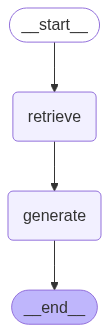

In [111]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [112]:
# 시퀀스 활용
# 디폴트로 함수명으로 노드를 생성
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve, generate])

sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate', END)

In [113]:
sequence_graph = sequence_graph_builder.compile()

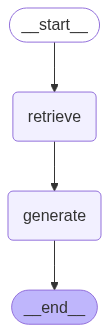

In [114]:
display(Image(sequence_graph.get_graph().draw_mermaid_png()))

In [115]:
initial_state = {'query' : query}
sequence_graph.invoke(initial_state)

{'query': '구글의 LLM 관련 투자 규모는?',
 'context': [Document(id='09964d55-41c0-4798-acc7-e9a7a47b59d6', metadata={'source': './documents/brief_2023년12월호_f.txt'}, page_content='아마존과 구글의 앤스프릭 투자에 앞서, 마이크로소프트는 차세대 AI 모델의 대표 주자인 오픈AI와 협력 확대\n\n마이크로소프트는 오픈AI에 앞서 투자한 30억 달러에 대해 2023년 1월 추가로 100억 달러를 투자하기로 하면서 오픈AI의 지분 49%를 확보했으며, 오픈AI는 마이크로소프트의 애저(Azure) 클라우드 플랫폼을 사용해 AI 모델을 훈련\n\n구글, 클라우드 경쟁력 강화를 위해 생성 AI 투자 확대\n\n구글은 수익성이 높은 클라우드 컴퓨팅 시장에서 아마존과 마이크로소프트를 따라잡고자 생성 AI를 통한 기업 고객의 클라우드 지출 확대를 위해 AI 투자 지속\n구글은 앤스프릭 외에도 동영상 제작 도구를 개발하는 런웨이(Runway)와 오픈소스 소프트웨어 기업 허깅페이스(Hugging Face)에도 투자\n구글은 첫 GPT의 기반 기술과 직접 경쟁할 수 있는 차세대 LLM ‘제미니(Gemini)’를 포함한 자체 시스템 개발에도 수십억 달러를 투자했으며, 2024년 제미니를 출시할 계획\n\n출처: The Wall Street Journal, Google Commits $2 Billion in Funding to AI Startup Anthropic, 2023.10.27. Bloomberg, AI Startup Anthropic to Use Google Chips in Expanded Partnership, 2023.11.09.\nIDC, 2027년 AI 소프트웨어 매출 2,500억 달러 돌파 전망\nKEY Contents\n\nIDC의 예측에 의하면 AI 소프트웨어 시장은 2027년 2,510억 달러로 성장하며, 생성 AI 플랫폼과 애플리케이션은 20